In [1]:
machine = 'mac'
machine = 'magny'

In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import copy

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *
from auriga_functions import *
%matplotlib inline

level   : 4
halo    : 24
snapnr  : 50
basedir : /hits/universe/GigaGalaxy/level4_MHD/
halodir : /hits/universe/GigaGalaxy/level4_MHD/halo_24/
snappath: /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/

[ 7.21020699  6.89154625  7.28530788]
Found 6825 stars.
Rotated pos.
Rotated bfld.
Rotated vel.

galrad  : 0.00284971334040165
redshift: 3.7087742646422353
time    : 0.21236949231329916
center  : [ 0.  0.  0.]



/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


level   : 4
halo    : 24
snapnr  : 55
basedir : /hits/universe/GigaGalaxy/level4_MHD/
halodir : /hits/universe/GigaGalaxy/level4_MHD/halo_24/
snappath: /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/

[ 9.10364056  8.72417164  9.26056767]
Found 34349 stars.
Rotated pos.
Rotated bfld.
Rotated vel.

galrad  : 0.004836001247167588
redshift: 2.7331426173187188
time    : 0.2678708269437177
center  : [ 0.  0.  0.]

level   : 4
halo    : 24
snapnr  : 60
basedir : /hits/universe/GigaGalaxy/level4_MHD/
halodir : /hits/universe/GigaGalaxy/level4_MHD/halo_24/
snappath: /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/

[ 10.96751499  10.54684067  11.19934082]
Found 84249 stars.
Rotated pos.
Rotated bfld.
Rotated vel.

galrad  : 0.008027402311563491
redshift: 2.1032696525957713
time    : 0.32224076923625916
center  : [ 0.  0.  0.]

level   : 4
halo    : 24
snapnr  : 80
basedir : /hits/universe/GigaGalaxy/level4_MHD/
halodir : /hits/universe/GigaGalaxy/level4_MHD/halo_24/
snappath: /hits/un

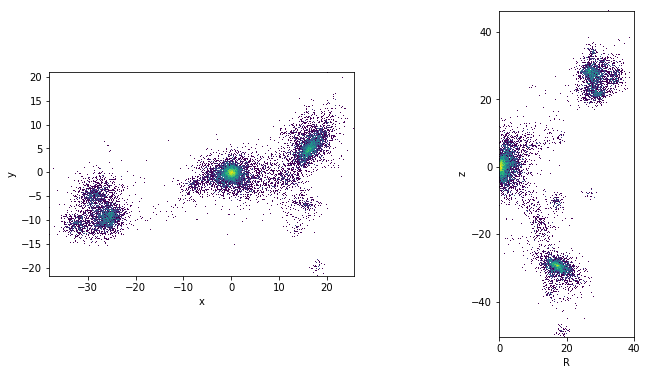

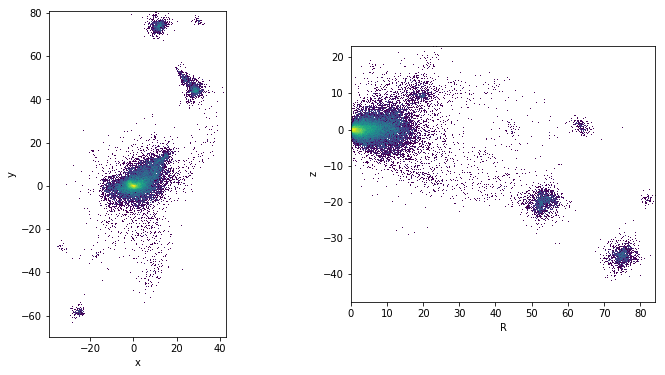

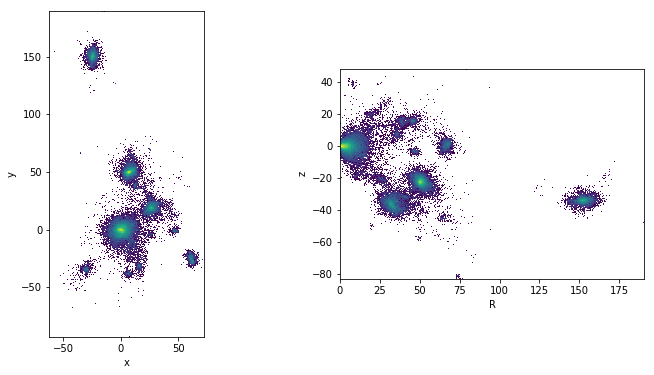

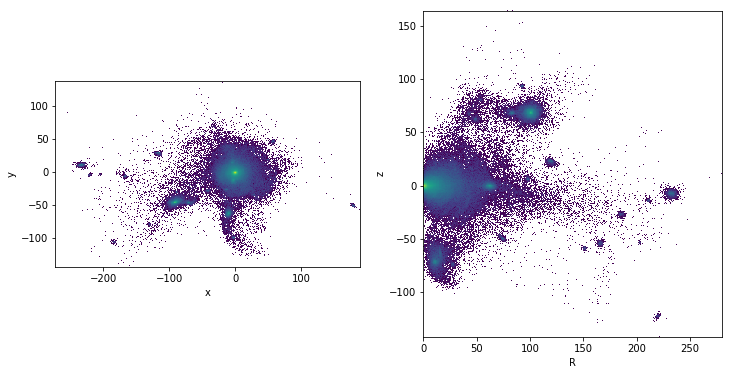

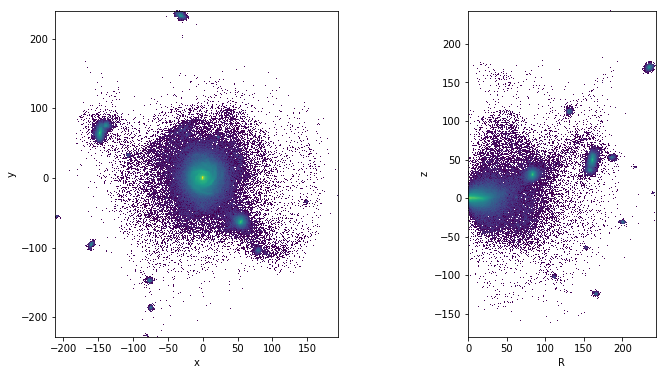

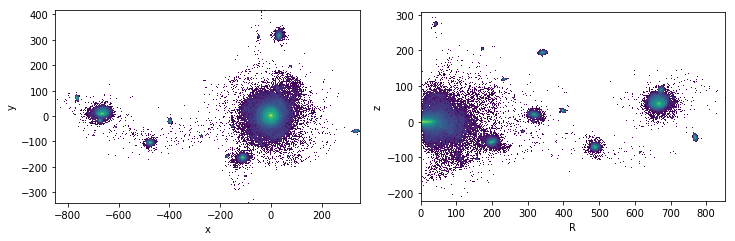

In [9]:
#### path = /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/*
level = 4
if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
j = 0
for halo_number in [24]:  # range(1, 31):
    halodir = basedir+"halo_{0}/".format(halo_number)
    snappath = halodir+"output/"
    for snapnr in [50,55,60,80,100,127]:
        print("level   : {0}".format(level))
        print("halo    : {0}".format(halo_number))
        print("snapnr  : {0}".format(snapnr))
        print("basedir : {0}".format(basedir))
        print("halodir : {0}".format(halodir))
        print("snappath: {0}\n".format(snappath))
        s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[0,1,2,3,4,5], 
            haloid=0, galradfac=0.1, verbose=True) 

        # Clean negative and zero values of gmet to avoid RuntimeErrors
        # later on (e.g. dividing by zero)
        s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )
        

        istarssub, = np.where( (s.type == 4) & (s.halo == 0) & (s.subhalo == 2) )
        if j == 0:
            ids_halo1 = s.id[istarssub]
        j +=1
        istars, = np.where( (s.type == 4) & (s.halo == 0) )
        (x, y, z), (vx, vy, vz), rxyz, rxy = get_cartesian_vectors(s, sf, istars)
        #xt, yt, zt = x[im], y[im], z[im]
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
  
        ax1.hist2d(1000*x, 1000*y, bins=401, norm=matplotlib.colors.LogNorm())
        ax1.set_xlabel("x")
        ax1.set_ylabel("y")
        ax1.set_aspect('equal')
        ax2.hist2d(1000*rxy, 1000*z, bins=401, norm=matplotlib.colors.LogNorm())
        ax2.set_xlabel("R")
        ax2.set_ylabel("z")
        ax2.set_aspect('equal')
        fig.show()

